In [243]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import seaborn as sns


In [244]:
data = datasets.load_boston()
df = pd.DataFrame(data.data,columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
X = np.array(df.iloc[:,:-1])
y = np.array(df['MEDV'])
depth = list(range(1,11))
param_grid = dict(max_depth = depth)
estimator = DecisionTreeRegressor(max_depth = 3)
grid_search = GridSearchCV(estimator,param_grid,cv=10)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)
print(param_grid)
grid_search = grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Test set score:0.70
Best parameters:{'max_depth': 5}
Best score on train set:0.72


In [246]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    print(test_scores_mean)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


[0.3867097  0.64323708 0.72938288 0.69847338 0.701663  ]


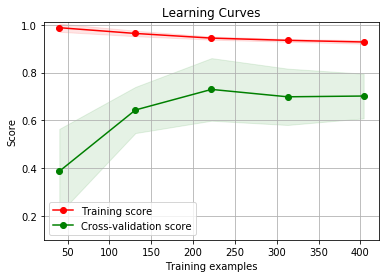

In [247]:
estimator = DecisionTreeRegressor(max_depth=5)
title = "Learning Curves"
X = np.array(df.iloc[:,:-1])
y = np.array(df['MEDV'])
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4).show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


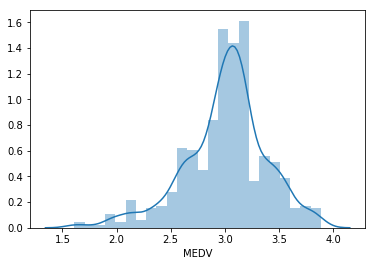

In [248]:
df = df[df['MEDV']<50]
df['MEDV'] = np.log(df['MEDV'])
sns.distplot(df['MEDV'])  
plt.show()

In [249]:
cols1 = ['RM', 'PTRATIO', 'LSTAT', 'B', 'CRIM', 'TAX', 'DIS', 'INDUS', 'ZN']
cols2 = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
cols3 = ['RM', 'PTRATIO', 'LSTAT', 'B', 'CRIM', 'TAX', 'DIS', 'INDUS']

In [250]:
data = df
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer


scaler = RobustScaler()
for feature in data.columns:
    data[feature] = scaler.fit_transform(data[[feature]])

dataSet = []
mean = []
std = []
delete = []
nums = []
mid = []

for feature in data.columns:
    m = data[feature].mean()
    s = np.sqrt(np.sum((data[feature] - m)**2)/(data.shape[0]-1))
    mean.append(m)
    std.append(s)
    mid.append(MID)
    
for feature in data.columns:
    n = np.percentile(data[feature],(25,50,75),interpolation='midpoint')
    U = n[0]
    MID = n[1]
    L = n[2]
    IQR = U - L
    up = U + 20*IQR
    low = L - 20*IQR
    nums.append(np.hstack((up,low)))
    mid.append(MID)
    
    

midcount = 0
for i in range(data.shape[0]):
    f = 0
    item = np.array(data.iloc[i,:])
    lr = np.abs(item - mean)/std
    if lr[len(lr)-1] > 3*std[len(lr)-1]:
        delete.append(data.iloc[i,:])
        f = 1
    if f == 0:
        dataSet.append(data.iloc[i,:])
delete = pd.DataFrame(delete)
dataSet = pd.DataFrame(dataSet)

for i in range(dataSet.shape[0]):
    item = np.array(dataSet.iloc[i,:])
    for j in range(dataSet.shape[1]):
        if (item[j] < nums[j][0]) or (item[j] > nums[j][1]):
            dataSet.iloc[i,j] = mid[j]
            midcount = 1 + midcount
delete = pd.DataFrame(delete)
dataSet = pd.DataFrame(dataSet)
print(midcount)


31


In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
X = np.array(dataSet.iloc[:,:-1])
y = np.array(dataSet['MEDV'])
depth = list(range(1,11))
param_grid = dict(max_depth = depth)
estimator = DecisionTreeRegressor(max_depth = 3)
grid_search = GridSearchCV(estimator,param_grid,cv=10)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)
print(param_grid)
grid_search = grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Test set score:0.81
Best parameters:{'max_depth': 5}
Best score on train set:0.71


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


[0.32286728 0.59181558 0.64756858 0.71370135 0.6994627 ]


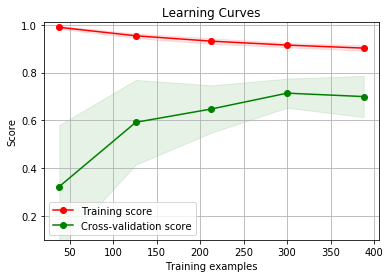

In [252]:
estimator = DecisionTreeRegressor(max_depth=5)
title = "Learning Curves"
X = np.array(dataSet.iloc[:,:-1])
y = np.array(dataSet['MEDV'])
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4).show()